In [2]:
import os
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
    header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
data=data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
data_dummies=pd.get_dummies(data)

In [5]:
features=data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values
print("X.shape: {} y.shape:{}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape:(32561,)


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(
    [("scaling", StandardScaler(), ['age','hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다.
data_features=data.drop("income", axis=1)
# 데이터 프레임과 income을 분할합니다.
X_train, X_test, y_train, y_test=train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans=ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [9]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans=ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


In [10]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [11]:
from sklearn.compose import make_column_transformer
ct=make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']), (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender','occupation'])
)

### 4.4. 구간 분할, 이산화 그리고 선형 모델, 트리 모델

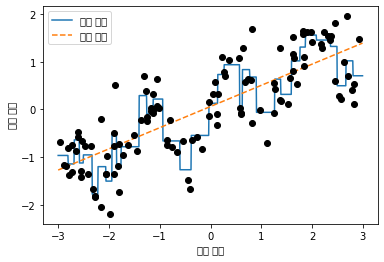

In [12]:

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X,y=mglearn.datasets.make_wave(n_samples=120)
line=np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg=LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

In [14]:
kb=KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [15]:
X_binned=kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [16]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [17]:
kb=KBinsDiscretizer(n_bins=10, strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned=kb.transform(X)

Text(0.5, 0, '입력 특성')

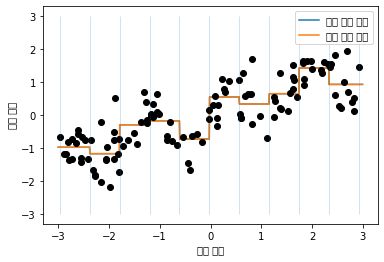

In [18]:
line_binned=kb.transform(line)

reg=LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3,3,linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

### 4.5 상호작용과 다항식

In [19]:
X_combined=np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


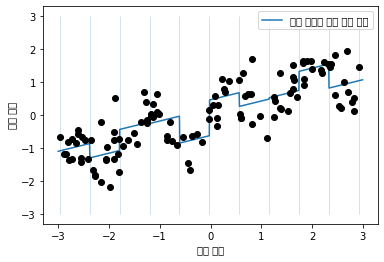

In [20]:
reg=LinearRegression().fit(X_combined, y)
line_combined=np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0],y, 'o', c='k')

In [21]:
X_product=np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(120, 20)


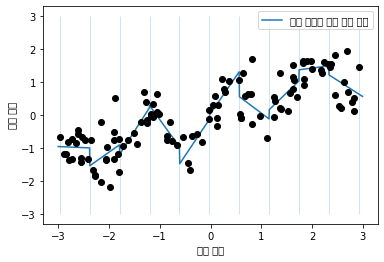

In [22]:
reg=LinearRegression().fit(X_product,y)

line_product=np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3,3,linewidth=1, alpha=.2)

plt.plot(X[:,0], y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
# x**10 까지의 고차항을 추가합니다.
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다.
poly=PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly=poly.transform(X)

In [25]:
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [26]:
print("X 원소:\n", X[:5])
print("X_poly 원소: \n", X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소: 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [27]:
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


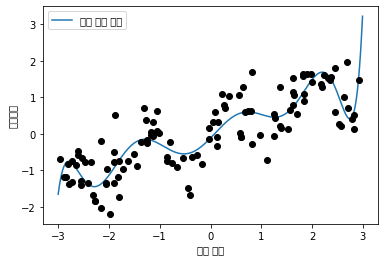

In [28]:
reg=LinearRegression().fit(X_poly, y)

line_poly=poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0],y ,'o', c='k')
plt.ylabel("회귀출력")
plt.xlabel('입력 특성')
plt.legend(loc="best")

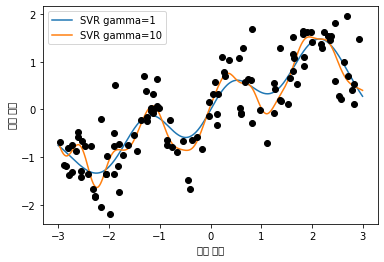

In [29]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [30]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
boston=load_boston()
X_train,X_test, y_train, y_test=train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
poly=PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly=poly.transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
print("X_train.shape", X_train)
print("X_train_poly.shape", X_train_poly)

X_train.shape [[1.9133e-01 2.2000e+01 5.8600e+00 ... 1.9100e+01 3.8913e+02 1.8460e+01]
 [1.0328e-01 2.5000e+01 5.1300e+00 ... 1.9700e+01 3.9690e+02 9.2200e+00]
 [1.0469e-01 4.0000e+01 6.4100e+00 ... 1.7600e+01 3.8925e+02 6.0500e+00]
 ...
 [1.5098e-01 0.0000e+00 1.0010e+01 ... 1.7800e+01 3.9451e+02 1.0300e+01]
 [2.2927e-01 0.0000e+00 6.9100e+00 ... 1.7900e+01 3.9274e+02 1.8800e+01]
 [1.3914e-01 0.0000e+00 4.0500e+00 ... 1.6600e+01 3.9690e+02 1.4690e+01]]
X_train_poly.shape [[1.         0.00207947 0.22       ... 0.96119883 0.46531113 0.22525458]
 [1.         0.00108981 0.25       ... 1.         0.21248227 0.04514871]
 [1.         0.00110566 0.4        ... 0.96179224 0.12018915 0.01501928]
 ...
 [1.         0.00162594 0.         ... 0.98798327 0.24165539 0.05910761]
 [1.         0.0025059  0.         ... 0.97913066 0.47917563 0.23450321]
 [1.         0.00149286 0.         ... 1.         0.36765957 0.13517356]]


In [33]:
print("다항 특성 이름 :\n", poly.get_feature_names())

다항 특성 이름 :
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [34]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때점수:{:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge=Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수:{:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때점수:0.621
상호작용 특성이 있을 때 점수:0.753


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled,y_test)))
rf=RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly,y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))


상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


In [39]:
rnd=np.random.RandomState(0)
X_org=rnd.normal(size=(1000, 3))
w=rnd.normal(size=3)

X=rnd.poisson(10*np.exp(X_org))
y=np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [40]:
print("특성 출현 횟수\n",np.bincount(X[:,0]))

특성 출현 횟수
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

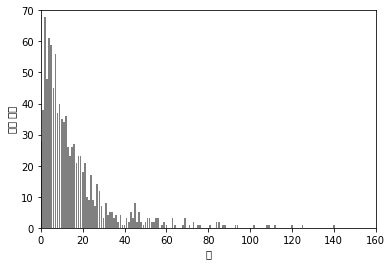

In [41]:
plt.xlim(0,160)
plt.ylim(0, 70)
bins=np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [42]:
from sklearn.linear_model import Ridge
X_train,X_test, y_train, y_test=train_test_split(X, y, random_state=0)
score=Ridge().fit(X_train,y_train).score(X_test, y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.622


In [43]:
X_train_log=np.log(X_train+1)
X_test_log=np.log(X_test +1)

Text(0.5, 0, '값')

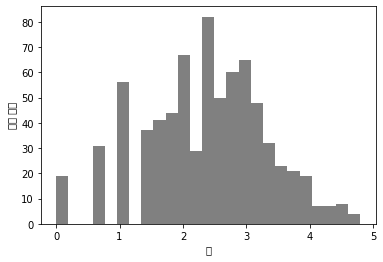

In [44]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [45]:
score=Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.875


### 일변량 통계

In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import  train_test_split

In [48]:
cancer=load_breast_cancer()

# 고정된 난수를 발생시킵니다.
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data), 50))
#데이터에 노이즈 특성을 추가합니다.
X_w_noise=np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test=train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
#f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다.
select=SelectPercentile(score_func=f_classif, percentile=50)

select.fit(X_train, y_train)
# 훈련세트를 적용합니다.
X_train_selected=select.transform(X_train)

print("X_train.shape", X_train.shape)
print("X_train_seleted.shape", X_train_selected.shape)

X_train.shape (284, 80)
X_train_seleted.shape (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0, 0.5, '[0]')

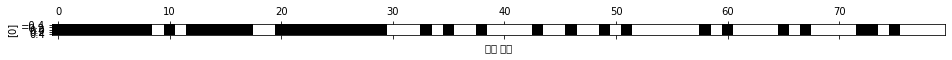

In [51]:
mask=select.get_support()
print(mask)
#True는 검은색, False는 흰색으로 마스킹합니다.
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.ylabel([0])

In [52]:
from sklearn.linear_model import LogisticRegression

#테스트 데이터 변환
X_test_selected=select.transform(X_test)

lr=LogisticRegression(max_iter=5000)
lr.fit(X_train,y_train)
print("전체 특성을 사용한 점수:{:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected,y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
    lr.score(X_test_selected, y_test)
))

전체 특성을 사용한 점수:0.951
선택된 일부 특성을 사용한 점수: 0.933


### 4.7.2 모델 기반 특성 선택

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), threshold="median"
)

In [54]:
select.fit(X_train, y_train)
X_train_l1=select.transform(X_train)
print("X_trian.shape: ", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_trian.shape:  (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, '특성 번호')

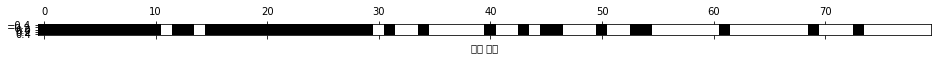

In [55]:
mask=select.get_support()
#True는 검은색, False는 흰색으로 마스킹합니다.
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [56]:
X_test_l1=select.transform(X_test)
score=LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.947


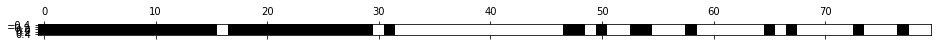

In [58]:
from sklearn.feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시
mask=select.get_support()
plt.matshow(mask.reshape(1, -1) ,cmap='gray_r')

In [59]:
X_train_rfe=select.transform(X_train)
X_test_rfe=select.transform(X_test)

score=LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(
    X_test_rfe, y_test

)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.940


In [60]:
print("테스트 점수:{:.3f}".format(select.score(X_test, y_test)))

테스트 점수:0.951


In [67]:
citibike=mglearn.datasets.load_citibike()
print("시티 바이크 데이터 \n", citibike.head())

시티 바이크 데이터 
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

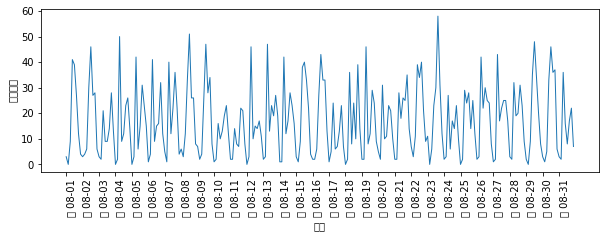

In [73]:
plt.figure(figsize=(10,3))
xticks=pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week=["일", "월", "화", "수", "목", "금", "토"]
xticks_name=[week[int(w)]+d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [74]:
# 타깃 값 추출(대여 횟수)
y=citibike.values
# POSIX 시간을 10**9로 나누어 변환
X=citibike.index.astype("int64").values.reshape(-1, 1)//10**9

In [75]:
#처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 데이터 세읕로 사용합니다.
n_train=184

#주어진 특성을 사용하여 평가하고 그래프를 만듭니다.
def eval_on_features(features ,target, regressor):
# 훈련 세트와 테스트 세트로 나눕니다.
    X_train, X_test=features[:n_train], features[n_train:]
#타깃 값도 나눕니다.
    y_train, y_test=target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2:{:.2f}".format(regressor.score(X_test ,y_test)))
    y_pred=regressor.predict(X_test)
    y_pred_train=regressor.predict(X_train)
    plt.figure(figsize=(10,3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train,len(y_test)+n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train),y_pred_train,'--',label="훈련 예측")

    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.ylabel("대여횟수")



테스트 세트 R^2:-0.04


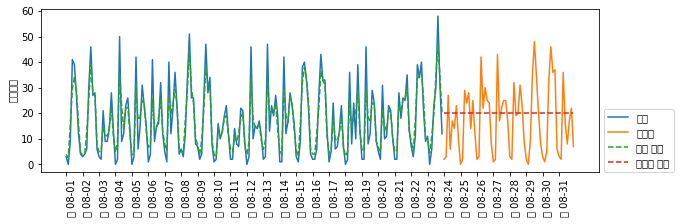

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X,y,regressor)

테스트 세트 R^2:0.60


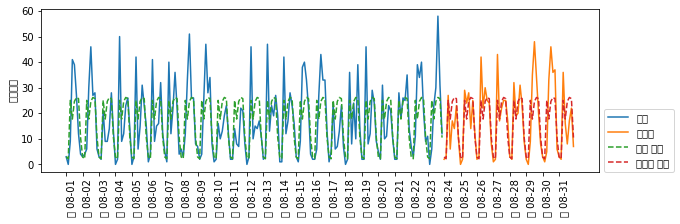

In [77]:
X_hour=citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2:0.84


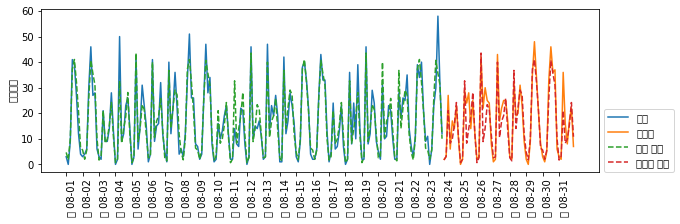

In [79]:
X_hour_week=np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2:0.13


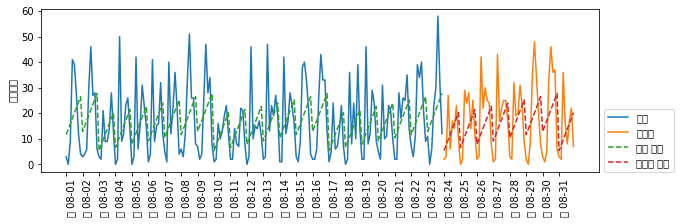

In [80]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [89]:
enc=OneHotEncoder()
X_hour_week_onehot=enc.fit_transform((X_hour_week))


테스트 세트 R^2:0.85


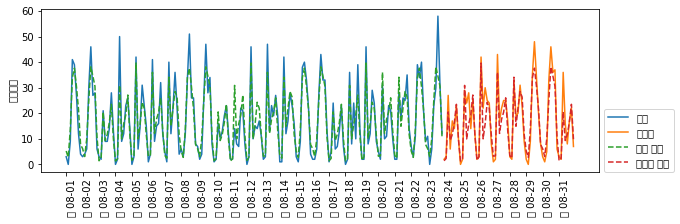

In [90]:
poly_transformer=PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)
X_hour_week_onehot_poly=poly_transformer.fit_transform(X_hour_week_onehot)
lr=Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [91]:
hour=["%02d:00" % i for i in range(0, 24, 3)]
day=["월", "화", "수", "목", "금", "토", "일"]
features=day+hour

In [92]:
features_poly=poly_transformer.get_feature_names_out(features)
features_nonzero=np.array(features_poly)[lr.coef_ !=0]
coef_nonzero=lr.coef_[lr.coef_ !=0]

Text(0, 0.5, '계수크기')

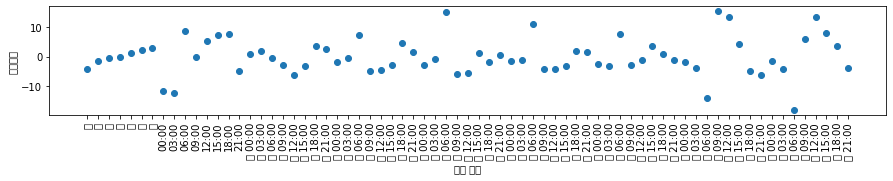

In [93]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수크기")